Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..237.0].


Type: <class 'PIL.Image.Image'>
Size: (939, 940)
Mode: RGB

Transformed tensor shape: torch.Size([3, 940, 939])
Tensor min value: 0.0
Tensor max value: 237.0


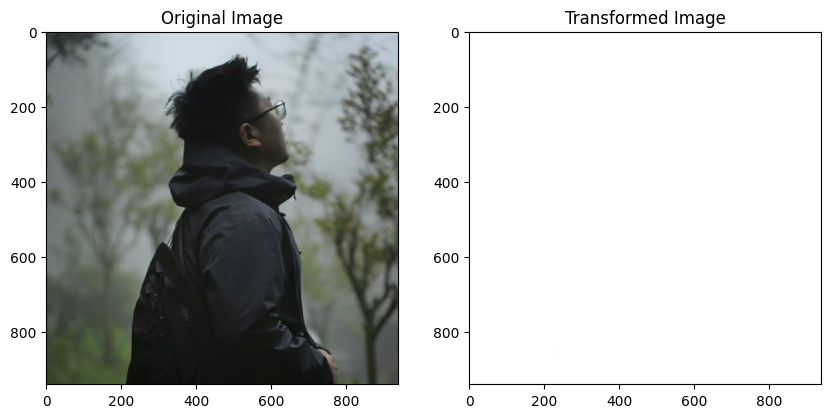

In [7]:
import torchvision as tv
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def test_image_loading(image_path='123.jpg'):
    # 1. Load image using default_loader
    content_image = tv.datasets.folder.default_loader(image_path)
    
    # 2. Print image information
    print("Type:", type(content_image))
    print("Size:", content_image.size)
    print("Mode:", content_image.mode)
    
    # 3. Display original image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(content_image)
    
    # 4. Test transformation
    content_transform = tv.transforms.Compose([
        tv.transforms.ToTensor(),
        tv.transforms.Lambda(lambda x: x.mul(255))
    ])
    
    transformed_image = content_transform(content_image)

    # 5. Print transformed tensor information
    print("\nTransformed tensor shape:", transformed_image.shape)
    print("Tensor min value:", transformed_image.min().item())
    print("Tensor max value:", transformed_image.max().item())
    
    # 6. Display transformed image
    plt.subplot(1, 2, 2)
    plt.title('Transformed Image')
    plt.imshow(transformed_image.permute(1, 2, 0).numpy())
    
    plt.show()

# Run the test
if __name__ == "__main__":
    # Replace '123.jpg' with your actual image path
    test_image_loading('123.jpg')

In [9]:
import torch
import os


def inspect_model(model_path="data/transformer.pth"):
    print(f"\n=== Inspecting model: {model_path} ===")

    # Check if file exists
    if not os.path.exists(model_path):
        print(f"Error: Model file not found at {os.path.abspath(model_path)}")
        return

    # Print basic file info
    size_mb = os.path.getsize(model_path) / (1024 * 1024)
    print(f"File size: {size_mb:.2f} MB")

    try:
        # Try loading the model
        state_dict = torch.load(model_path, map_location="cpu")

        # Print model structure
        print("\nModel layers:")
        for key in state_dict.keys():
            if isinstance(state_dict[key], torch.Tensor):
                print(
                    f"{key}: shape {state_dict[key].shape}, "
                    f"device {state_dict[key].device}, "
                    f"dtype {state_dict[key].dtype}"
                )

        # Get device info from first parameter
        first_param = next(iter(state_dict.values()))
        print(f"\nOriginal save device: {first_param.device}")

    except Exception as e:
        print(f"Error loading model: {e}")


if __name__ == "__main__":
    # You can also specify the full path when calling the function
    model_path = "data/transformer.pth"  # Update this to match your actual path
    inspect_model(model_path)


=== Inspecting model: data/transformer.pth ===
File size: 6.43 MB

Model layers:
initial_layers.0.conv2d.weight: shape torch.Size([32, 3, 9, 9]), device cpu, dtype torch.float32
initial_layers.0.conv2d.bias: shape torch.Size([32]), device cpu, dtype torch.float32
initial_layers.1.weight: shape torch.Size([32]), device cpu, dtype torch.float32
initial_layers.1.bias: shape torch.Size([32]), device cpu, dtype torch.float32
initial_layers.1.running_mean: shape torch.Size([32]), device cpu, dtype torch.float32
initial_layers.1.running_var: shape torch.Size([32]), device cpu, dtype torch.float32
initial_layers.3.conv2d.weight: shape torch.Size([64, 32, 3, 3]), device cpu, dtype torch.float32
initial_layers.3.conv2d.bias: shape torch.Size([64]), device cpu, dtype torch.float32
initial_layers.4.weight: shape torch.Size([64]), device cpu, dtype torch.float32
initial_layers.4.bias: shape torch.Size([64]), device cpu, dtype torch.float32
initial_layers.4.running_mean: shape torch.Size([64]), dev

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16840\1304547817.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location='c

In [10]:
import torch
import os

def inspect_model(model_path='data/transformer.pth'):
    print(f"\n=== Inspecting model: {model_path} ===")
    
    try:
        # Try loading the model with lambda function
        state_dict = torch.load(model_path, map_location=lambda _s, _: _s)
        
        # Let's print the device of each parameter to understand mapping
        print("\nModel layers and their devices:")
        for key, tensor in state_dict.items():
            if isinstance(tensor, torch.Tensor):
                print(f"{key}: device {tensor.device}")
                
        # The lambda function lambda _s, _: _s works like this:
        # _s: source device (where tensor was saved)
        # _: destination device (where we want to load)
        # returning _s means "keep tensor on its original device"
        
        first_param = next(iter(state_dict.values()))
        print(f"\nOriginal save device: {first_param.device}")
        
    except Exception as e:
        print(f"Error loading model: {e}")

if __name__ == "__main__":
    inspect_model('data/transformer.pth') 


=== Inspecting model: data/transformer.pth ===

Model layers and their devices:
initial_layers.0.conv2d.weight: device cpu
initial_layers.0.conv2d.bias: device cpu
initial_layers.1.weight: device cpu
initial_layers.1.bias: device cpu
initial_layers.1.running_mean: device cpu
initial_layers.1.running_var: device cpu
initial_layers.3.conv2d.weight: device cpu
initial_layers.3.conv2d.bias: device cpu
initial_layers.4.weight: device cpu
initial_layers.4.bias: device cpu
initial_layers.4.running_mean: device cpu
initial_layers.4.running_var: device cpu
initial_layers.6.conv2d.weight: device cpu
initial_layers.6.conv2d.bias: device cpu
initial_layers.7.weight: device cpu
initial_layers.7.bias: device cpu
initial_layers.7.running_mean: device cpu
initial_layers.7.running_var: device cpu
res_layers.0.conv1.conv2d.weight: device cpu
res_layers.0.conv1.conv2d.bias: device cpu
res_layers.0.in1.weight: device cpu
res_layers.0.in1.bias: device cpu
res_layers.0.in1.running_mean: device cpu
res_laye

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16840\3318813040.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=lam

In [11]:
import torch

# Let's create a simple example to demonstrate device mapping
def demonstrate_map_location():
    # 1. Create a simple tensor and save it
    original_tensor = torch.tensor([1, 2, 3], device='cpu')
    torch.save(original_tensor, 'test_tensor.pt')
    
    # 2. Different ways to load the tensor
    # Method 1: Direct device mapping
    tensor_to_cpu = torch.load('test_tensor.pt', map_location='cpu')
    
    # Method 2: Using lambda function
    tensor_with_lambda = torch.load('test_tensor.pt', map_location=lambda _s, _: _s)
    
    # Method 3: Using explicit lambda to change device
    tensor_force_cuda = torch.load('test_tensor.pt', map_location=lambda _s, _: 'cuda')
    
    print("Example of how map_location lambda works:")
    print("\nCase 1: tensor saved on CPU, loading to CPU")
    print(f"Source device (s): 'cpu'")
    print(f"Destination device (d): 'cpu'")
    print(f"lambda 'cpu', 'cpu': 'cpu' (keeps original device)")
    
    print("\nCase 2: tensor saved on GPU, loading to CPU")
    print(f"Source device (s): 'cuda:0'")
    print(f"Destination device (d): 'cpu'")
    print(f"lambda 'cuda:0', 'cpu': 'cuda:0' (keeps original device)")
    
    # More explicit example using a custom mapping function
    def custom_device_mapping(source_device, _):
        print(f"\nMapping called with:")
        print(f"  - Source device: {source_device}")
        return source_device  # This is what lambda _s, _: _s does
    
    tensor_custom = torch.load('test_tensor.pt', map_location=custom_device_mapping)

# Run the demonstration
demonstrate_map_location()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16840\409387593.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensor_to_cpu = torch.load('test_tensor.pt', map_loc

TypeError: TypedStorage.__init__ received an invalid combination of arguments. Expected one of:
 * (*, torch.device device, torch.dtype dtype)
 * (int size, *, torch.device device, torch.dtype dtype)
 * (Sequence data, *, torch.device device, torch.dtype dtype)
 * (*, UntypedStorage wrap_storage, torch.dtype dtype)
Argument 'wrap_storage' must be UntypedStorage, but got <class 'str'>

In [12]:
import torch

# Create a simple model and save it
def save_and_load_example():
    # 1. Create a model and save it
    model = torch.nn.Linear(10, 5)
    if torch.cuda.is_available():
        model = model.cuda()  # Move to GPU
    torch.save(model.state_dict(), 'example_model.pth')
    
    # 2. Load it with a debug mapping function
    def debug_mapping(source_device, target_device):
        print(f"Loading tensor from {source_device} to {target_device}")
        return source_device  # Same as lambda _s, _: _s
    
    # 3. Load the model - this will trigger the mapping function
    state_dict = torch.load('example_model.pth', map_location=debug_mapping)

# Run example
save_and_load_example()

Loading tensor from  16
 210
 192
 61
 124
 217
 136
 61
 149
 233
 49
 190
 65
 120
 158
 190
 230
 195
 14
 62
 248
 181
 203
 189
 137
 182
 40
 190
 216
 245
 10
 189
 231
 81
 31
 190
 96
 26
 134
 60
 250
 89
 42
 62
 66
 238
 75
 62
 160
 152
 2
 62
 36
 17
 227
 61
 4
 46
 21
 190
 224
 216
 70
 60
 204
 47
 76
 190
 220
 35
 159
 61
 227
 1
 73
 190
 68
 32
 163
 189
 0
 205
 200
 59
 41
 160
 140
 190
 228
 97
 206
 189
 246
 77
 114
 190
 122
 79
 145
 189
 216
 197
 190
 61
 97
 59
 151
 62
 0
 62
 235
 188
 224
 192
 140
 190
 144
 215
 48
 61
 72
 212
 188
 61
 247
 37
 145
 62
 142
 149
 15
 190
 158
 17
 90
 62
 188
 28
 42
 190
 161
 249
 60
 190
 6
 87
 67
 62
 64
 224
 129
 188
 139
 111
 134
 62
 136
 227
 83
 61
 70
 119
 77
 62
 156
 65
 149
 61
 206
 243
 137
 190
 98
 198
 191
 189
 180
 208
 46
 190
 5
 143
 156
 190
 174
 207
 63
 190
 219
 202
 47
 190
 72
 33
 85
 189
 64
 3
 252
 59
[torch.storage.UntypedStorage(device=cpu) of size 200] to cpu
Loading tenso

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16840\3147263880.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('example_model.pth', map_lo

: 

In [1]:
import numpy as np

def simple_bilinear_example():
    # Let's use a simple bilinear operation: multiplication of two numbers
    # f(x,y) = x * y is bilinear
    
    # Test values
    x1 = 2
    x2 = 3
    y = 4
    k = 2
    
    print("Example 1: Linear in first argument (x)")
    print(f"f({k}*{x1}, {y}) = {k*x1 * y}")
    print(f"{k}*f({x1}, {y}) = {k*(x1*y)}")
    print("They are equal!")
    
    print("\nExample 2: Linear in second argument (y)")
    print(f"f({x1}, {k}*{y}) = {x1 * (k*y)}")
    print(f"{k}*f({x1}, {y}) = {k*(x1*y)}")
    print("They are equal!")
    
    print("\nExample 3: Distributive property")
    print(f"f({x1}+{x2}, {y}) = {(x1+x2)*y}")
    print(f"f({x1}, {y}) + f({x2}, {y}) = {x1*y + x2*y}")
    print("They are equal!")

# Run the example
simple_bilinear_example()

Example 1: Linear in first argument (x)
f(2*2, 4) = 16
2*f(2, 4) = 16
They are equal!

Example 2: Linear in second argument (y)
f(2, 2*4) = 16
2*f(2, 4) = 16
They are equal!

Example 3: Distributive property
f(2+3, 4) = 20
f(2, 4) + f(3, 4) = 20
They are equal!


In [2]:
# Example of how ReflectionPad2d works
import torch
import torch.nn as nn

# Create a simple 3x3 input
input = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

# Create reflection padding layer with padding size 1
reflection_pad = nn.ReflectionPad2d(1)

# Apply padding
output = reflection_pad(input)

# Result will be 5x5:
# [[2 1 2 3 2]
#  [4 1 2 3 2]
#  [7 4 5 6 3]
#  [8 7 8 9 6]
#  [5 4 5 6 3]]

In [3]:
output

tensor([[[[5, 4, 5, 6, 5],
          [2, 1, 2, 3, 2],
          [5, 4, 5, 6, 5],
          [8, 7, 8, 9, 8],
          [5, 4, 5, 6, 5]]]])

In [4]:
import torch
import torch.nn as nn

class SimpleInstanceNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True):
        super().__init__()
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        self.affine = affine
        self.track_running_stats = track_running_stats
        
        if self.affine:
            # Learnable parameters gamma (scale) and beta (bias)
            self.gamma = nn.Parameter(torch.ones(num_features))
            self.beta = nn.Parameter(torch.zeros(num_features))
            
        if self.track_running_stats:
            # Running statistics for inference mode
            self.running_mean = torch.zeros(num_features)
            self.running_var = torch.ones(num_features)
            
    def forward(self, x):
        # x shape: [N, C, H, W]
        N, C, H, W = x.shape
        
        # Compute mean and variance across spatial dimensions (H, W)
        # Keep dims=True to maintain broadcasting dimensions
        mean = x.mean(dim=(2, 3), keepdim=True)  # Shape: [N, C, 1, 1]
        var = x.var(dim=(2, 3), keepdim=True, unbiased=False)  # Shape: [N, C, 1, 1]
        
        if self.training and self.track_running_stats:
            # Update running statistics
            with torch.no_grad():
                self.running_mean = (1 - self.momentum) * self.running_mean + \
                                  self.momentum * mean.mean(dim=0).squeeze()
                self.running_var = (1 - self.momentum) * self.running_var + \
                                 self.momentum * var.mean(dim=0).squeeze()
        
        if not self.training and self.track_running_stats:
            # Use running statistics in eval mode
            mean = self.running_mean.view(1, C, 1, 1)
            var = self.running_var.view(1, C, 1, 1)
            
        # Normalize
        x_norm = (x - mean) / torch.sqrt(var + self.eps)
        
        if self.affine:
            # Apply learnable scale and bias
            x_norm = x_norm * self.gamma.view(1, C, 1, 1) + self.beta.view(1, C, 1, 1)
            
        return x_norm

# Example usage:
if __name__ == "__main__":
    # Create a sample input
    batch_size, channels, height, width = 2, 32, 64, 64
    x = torch.randn(batch_size, channels, height, width)
    
    # Create instance norm layer
    instance_norm = SimpleInstanceNorm2d(num_features=channels)
    
    # Apply normalization
    output = instance_norm(x)
    
    print(f"Input shape: {x.shape}")
    print(f"Output shape: {output.shape}")
    print(f"\nInput mean: {x.mean():.4f}")
    print(f"Input std: {x.std():.4f}")
    print(f"Output mean: {output.mean():.4f}")
    print(f"Output std: {output.std():.4f}")

Input shape: torch.Size([2, 32, 64, 64])
Output shape: torch.Size([2, 32, 64, 64])

Input mean: 0.0010
Input std: 0.9977
Output mean: 0.0000
Output std: 1.0000


In [1]:
import torch

# Let's create a small feature map with:
# batch_size (b) = 1
# channels (ch) = 3 (like RGB)
# height (h) = 2
# width (w) = 2

# Create sample feature map
features = torch.tensor([
    [  # Batch 1
        [  # Channel 1
            [1, 2],  # 2x2 spatial area
            [3, 4]
        ],
        [  # Channel 2
            [5, 6],
            [7, 8]
        ],
        [  # Channel 3
            [9, 10],
            [11, 12]
        ]
    ]
])

print("Original features shape:", features.shape)  # [1, 3, 2, 2]

# Step 1: Reshape to (b, ch, h*w)
b, ch, h, w = features.shape
features_reshaped = features.view(b, ch, h * w)
print("\nReshaped features:")
print(features_reshaped)
print("Reshaped shape:", features_reshaped.shape)  # [1, 3, 4]

# Step 2: Transpose to (b, h*w, ch)
features_t = features_reshaped.transpose(1, 2)
print("\nTransposed features:")
print(features_t)
print("Transposed shape:", features_t.shape)  # [1, 4, 3]

# Step 3: Compute gram matrix: (b, ch, h*w) @ (b, h*w, ch) -> (b, ch, ch)
gram = features_reshaped.bmm(features_t) / (ch * h * w)
print("\nFinal gram matrix:")
print(gram)
print("Gram matrix shape:", gram.shape)  # [1, 3, 3]

# Let's see the actual computation for one element
print("\nDetailed computation example:")
print("Gram matrix [0,0,0] calculation:")
print(f"(1×1 + 2×2 + 3×3 + 4×4) / (3×2×2) = {(1*1 + 2*2 + 3*3 + 4*4)/(3*2*2):.3f}")

Original features shape: torch.Size([1, 3, 2, 2])

Reshaped features:
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]]])
Reshaped shape: torch.Size([1, 3, 4])

Transposed features:
tensor([[[ 1,  5,  9],
         [ 2,  6, 10],
         [ 3,  7, 11],
         [ 4,  8, 12]]])
Transposed shape: torch.Size([1, 4, 3])

Final gram matrix:
tensor([[[ 2.5000,  5.8333,  9.1667],
         [ 5.8333, 14.5000, 23.1667],
         [ 9.1667, 23.1667, 37.1667]]])
Gram matrix shape: torch.Size([1, 3, 3])

Detailed computation example:
Gram matrix [0,0,0] calculation:
(1×1 + 2×2 + 3×3 + 4×4) / (3×2×2) = 2.500
